<center><img src='./Figs/cs-logo.png' width=200></center>



<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>TP2 : Pré-traitements et Filtrage d'images </center>
<hr style=" border:none; height:3px;">
</h1>

## Exercice 1 : Quelques manipulations simples avec des histogrammes

L'objectif de cet exercice est de refaire quelques manipulations simples d'images au travers de la notion d'histogramme. Vous travaillerez sur une image de votre choix.

+ Ouvrir l'image et la visualiser. On travaillera dans un premier temps sur l'image en niveau de gris.


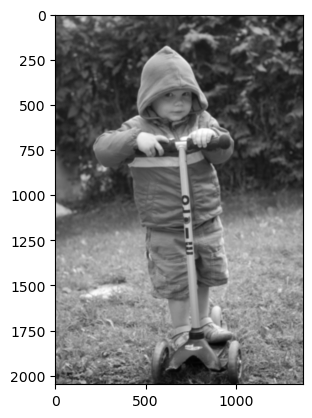

In [1]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt


def loadImagebis(src):
    img=cv2.imread(src,0)
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.show()
    return img

    
img = loadImagebis('./Images/oscar.jpg')

+ Calculer et visualiser l'histogramme de cette image. 


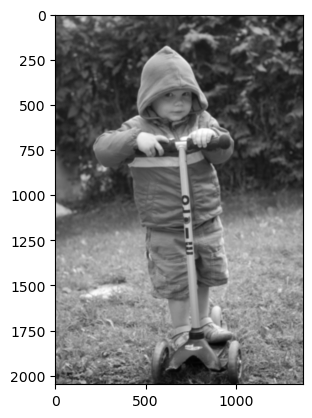

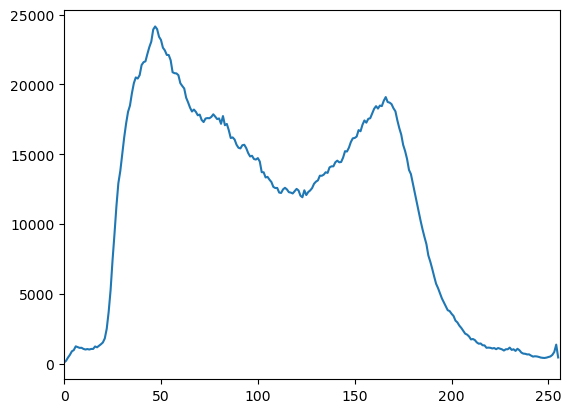

In [10]:
img = loadImagebis('./Images/oscar.jpg')

hist_img = cv2.calcHist([img],[0],None,[256],[0,256])

plt.plot(hist_img)
plt.xlim([0,256])
plt.show()


+ Ecrire une fonction qui permet de déterminer le niveau de gris minimum et le niveau de gris maximum d'une image et l'appliquer à votre image.


In [11]:
import numpy as np

def MinMaxGray(I):
    return np.amax(I),np.amin(I)
   
print(MinMaxGray(img))  

(255, 0)


 + Ecrire une fonction **egalisationHisto (I,h)** qui, à partir d'une image $I$ et de son histogramme $h$ renvoie l'image après égalisation. Vous pourrez aussi afficher l'histogramme de l'image après égalisation.
 
Dans une première version, vous n'utiliserez pas les méthodes proposées par la bibliothèque OpenCV autre que celles permettant de construire un histogramme **calcHist**. Il faudra donc calculer l'histogramme cumulé et appliquer la transformation vue en cours.


La réponse était [ici](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html)

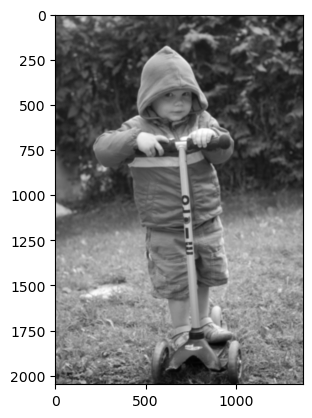

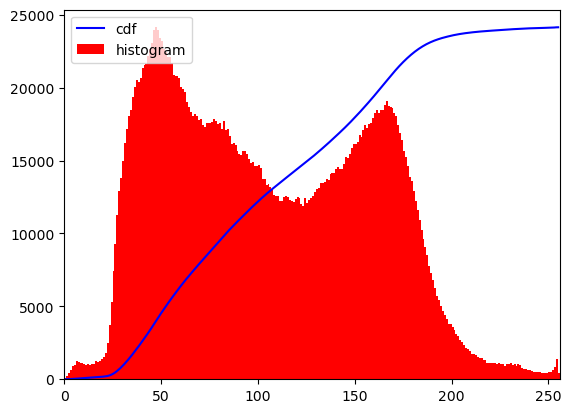

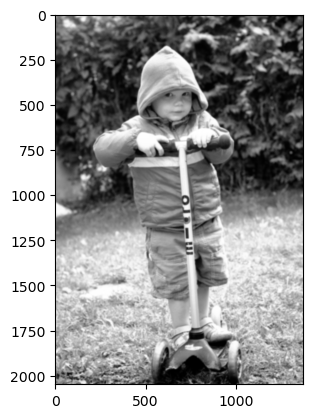

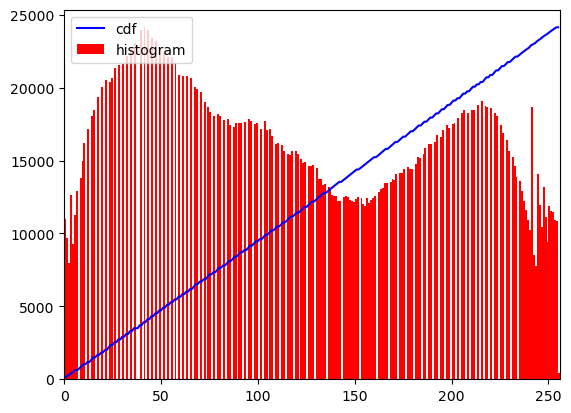

In [12]:
def computeCumulatedHisto(I):
    hist,bins = np.histogram(I.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    return cdf_normalized




def egalisationHisto(h,I):
    cdf_m = np.ma.masked_equal(h,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    img2 = cdf[I]
    return img2
    
# Chargement de l'image en niveaux de gris
img = loadImagebis('./Images/oscar.jpg')
# calcul de l'histogramme cumulé avec numpy
cum_hist = computeCumulatedHisto(img)
# Visualisation
plt.plot(cum_hist, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Application de l'egalisation
new_img = egalisationHisto(cum_hist,img)
plt.imshow(new_img ,cmap = 'gray', interpolation = 'bicubic')
plt.show()


hist,bins = np.histogram(new_img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
# Visualisation
plt.plot(cdf_normalized, color = 'b')
plt.hist(new_img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

+ Ecrire une deuxième version **egalisationHistobis(h,I)** dans laquelle vous pouvez utiliser les méthodes déjà disponibles dans OpenCV et numpy et décrites [ici](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html#histogram-equalization)

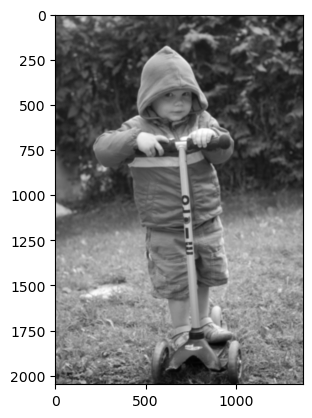

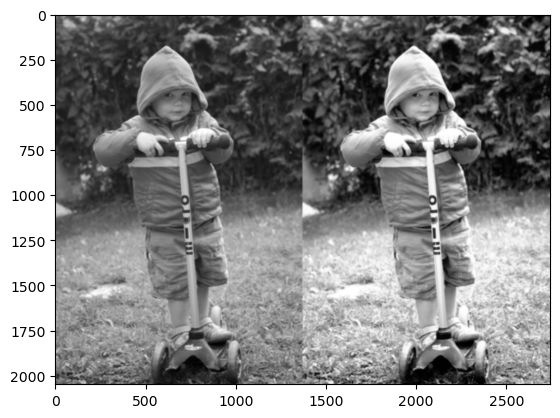

In [13]:
def egalisationHistobis(I):
    equ = cv2.equalizeHist(I)
    res = np.hstack((I,equ))
    return res

# Chargement de l'image en niveaux de gris
img = loadImagebis('./Images/oscar.jpg')
img_eq = egalisationHistobis(img)
plt.imshow(img_eq ,cmap = 'gray', interpolation = 'bicubic')
plt.show()


Appliquer maintenant le principe de l'égalisation d'histogramme à une image couleur avec deux stratégies :
+ Une première stratégie consistera à appliquer le principe de l'égalisation sur chacune des composantes couleur de votre image.
+ Une deuxième stratégie consiste en l'application d'un passage en HSV puis de l'application de l'égalisation uniquement sur la composante $V$. 

Que constatez-vous ?

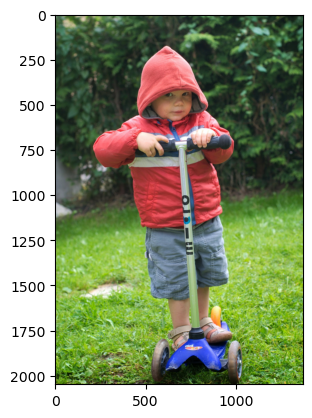

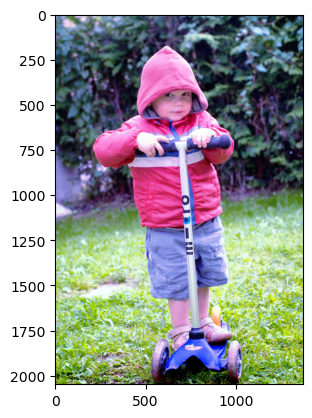

In [14]:
# Strategie 1 : egalisation de chacune des composantes
img = cv2.imread('./Images/oscar.jpg',1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Travail sur le canal B
cum_hist_B = computeCumulatedHisto(cv2.split(img)[0])
# Travail sur le canal G
cum_hist_G = computeCumulatedHisto(cv2.split(img)[1])
# Travail sur le canal R
cum_hist_R = computeCumulatedHisto(cv2.split(img)[2])

# Application de l'egalisation
new_img_B = egalisationHisto(cum_hist_B,cv2.split(img)[0])
new_img_G = egalisationHisto(cum_hist_G,cv2.split(img)[1])
new_img_R = egalisationHisto(cum_hist_R,cv2.split(img)[2])

img_eq_1 = cv2.merge((new_img_B,new_img_G,new_img_R))

plt.imshow(cv2.cvtColor(img_eq_1, cv2.COLOR_BGR2RGB))
plt.show()

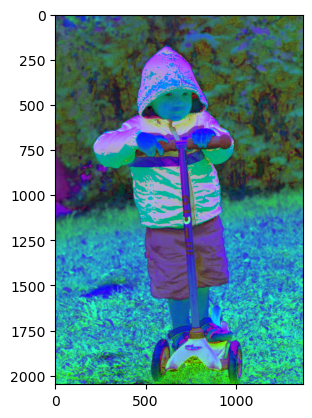

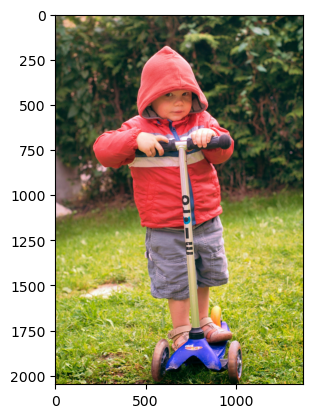

In [15]:
# Strategie 2

img = cv2.imread('./Images/oscar.jpg',1)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
plt.show()


# Travail sur le canal B
cum_hist_V = computeCumulatedHisto(cv2.split(img)[2])
# Application de l'egalisation
new_img_V = egalisationHisto(cum_hist_V,cv2.split(img)[2])

img_eq_2 = cv2.merge((cv2.split(img)[0],cv2.split(img)[1],new_img_V))

plt.imshow(cv2.cvtColor(img_eq_2, cv2.COLOR_BGR2RGB))
plt.show()

## Exercice 2 : filtrage

### Utilisation des fonctions d'OpenCV

La bibliothèque OpenCV possède plusieurs fonctions prédéfinies pour la filtrage d'images. En particulier, les différents filtres vus en cours ont tous des fonctions associées :
+  Les fonctions **blur** et **boxFilter** permettent de filtrer une image par un filtre moyenneur dont la taille est paramétrable.
+  La fonction **GaussianBlur** permet l'application d'un filtre gaussien à une image.
+  La fonction **medianBlur** permet l'application d'un filtre median à une image.

Tester ces différentes fonctions sur une image cible (en couleur et en niveau de gris) en jouant sur les différents paramètres, notamment la taille des filtres et la gestion des bords.
Tutorial [ici](http://docs.opencv.org/3.2.0/d4/d13/tutorial_py_filtering.html)


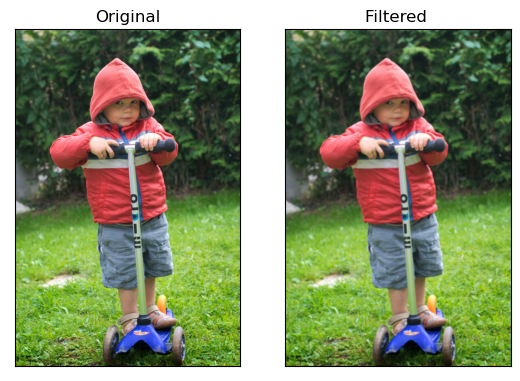

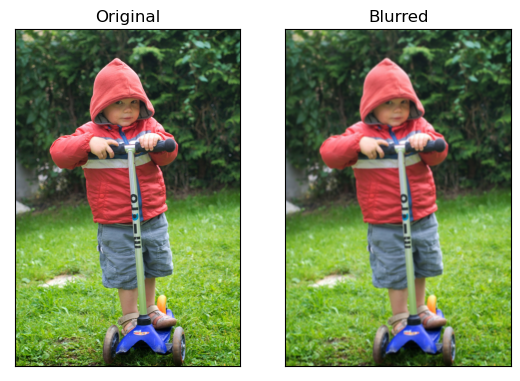

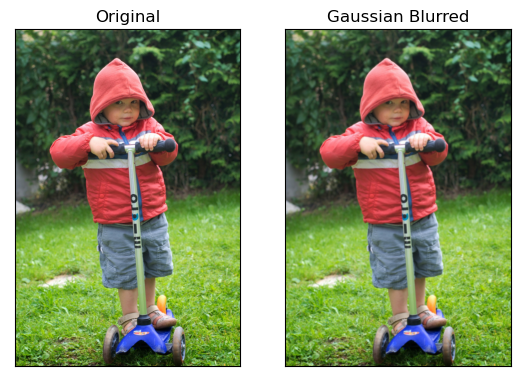

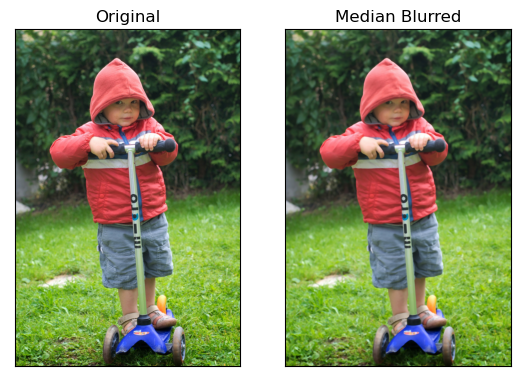

In [16]:

img = cv2.imread('./Images/oscar.jpg',1)
img_BGR= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((7,7),np.float32)/49
filtered_img = cv2.filter2D(img_BGR,-1,kernel)



blurred_img = cv2.blur(img_BGR,(11,11))
gaussian_blurred_img =cv2.GaussianBlur(img_BGR,(9,9),0) 
median_blurred_img =cv2.medianBlur(img_BGR,9) 


plt.subplot(121),plt.imshow(img_BGR),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filtered_img),plt.title('Filtered ')
plt.xticks([]), plt.yticks([])
plt.show()



plt.subplot(121),plt.imshow(img_BGR),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurred_img),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


plt.subplot(121),plt.imshow(img_BGR),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gaussian_blurred_img),plt.title('Gaussian Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121),plt.imshow(img_BGR),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median_blurred_img),plt.title('Median Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

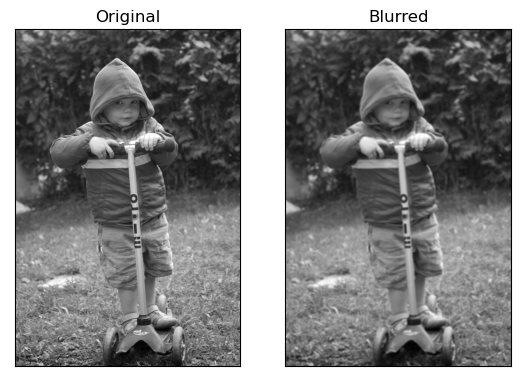

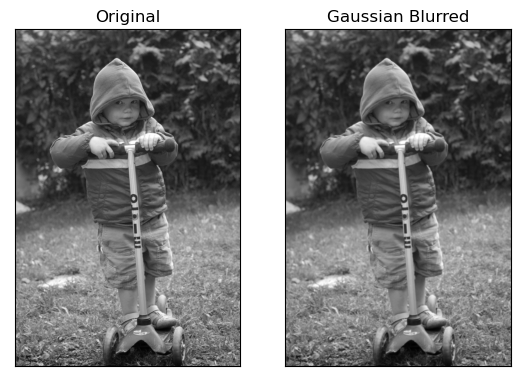

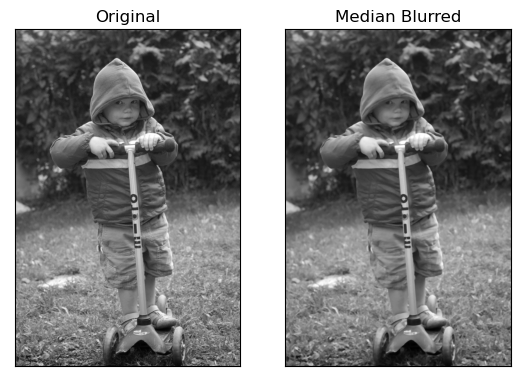

In [17]:
img = cv2.imread('./Images/oscar.jpg',1)
img_gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blurred_img = cv2.blur(img_gray,(11,11))
gaussian_blurred_img =cv2.GaussianBlur(img_gray,(9,9),0) 
median_blurred_img =cv2.medianBlur(img_gray,9) 

plt.subplot(121),plt.imshow(img_gray, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurred_img, cmap = 'gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


plt.subplot(121),plt.imshow(img_gray, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gaussian_blurred_img, cmap = 'gray'),plt.title('Gaussian Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121),plt.imshow(img_gray, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median_blurred_img, cmap = 'gray'),plt.title('Median Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


### Implémentation de l'opération de convolution (adapté du cours CS 131 Stanford)

L'objectif ici est d'implémenter deux versions de l'opération de convolution :
+ Une version naive (**conv_nested**)
+ Une version rapide (**conv_fast**)

Ecrire la fonction **conv_nested**, une implémentation naïve de la convolution ( 4 boucles imbriquées) prenant en entrée une image $I$ et un masque de convolution $h$ et qui renvoie l'image filtrée ($I * h$).


In [18]:
def conv_nested(image,kernel):
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    delta_y = Hk // 2
    delta_x = Wk // 2

    for m in range(Hi):
        for n in range(Wi):
            sum = 0
            for i in range(-delta_y, delta_y + 1):
                for j in range(-delta_x, delta_x + 1):
                    if m - i < 0 or n - j < 0 or m - i >= Hi or n - j >= Wi:
                        sum += 0
                    else:
                        sum += image[m - i, n - j] * kernel[delta_y + i, delta_x + j]
            out[m, n] = sum

    return out


Tester cette fonction sur une image simple

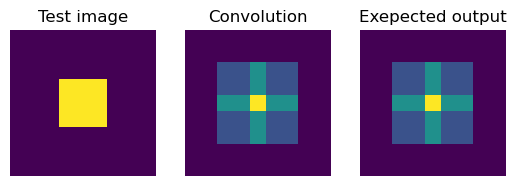

In [19]:
kernel = np.array(
[
    [1,0,1],
    [0,0,0],
    [1,0,1]
])

# Create a test image: a white square in the middle
test_img = np.zeros((9, 9))
test_img[3:6, 3:6] = 1

# Run your conv_nested function on the test image
test_output = conv_nested(test_img, kernel)

# Build the expected output
expected_output = np.zeros((9, 9))
expected_output[2:7, 2:7] = 1
expected_output[4, 2:7] = 2
expected_output[2:7, 4] = 2
expected_output[4, 4] = 4

# Plot the test image
plt.subplot(1,3,1)
plt.imshow(test_img)
plt.title('Test image')
plt.axis('off')

# Plot your convolved image
plt.subplot(1,3,2)
plt.imshow(test_output)
plt.title('Convolution')
plt.axis('off')

# Plot the exepected output
plt.subplot(1,3,3)
plt.imshow(expected_output)
plt.title('Exepected output')
plt.axis('off')
plt.show()

# Test if the output matches expected output
assert np.max(test_output - expected_output) < 1e-10, "Your solution is not correct."

Tester maintenant votre fonction sur une image réelle avec le filtre de votre choix (existant dans OpenCV) et comparer le résultat obtenu avec celui que vous obtenez de la fonction OpenCV

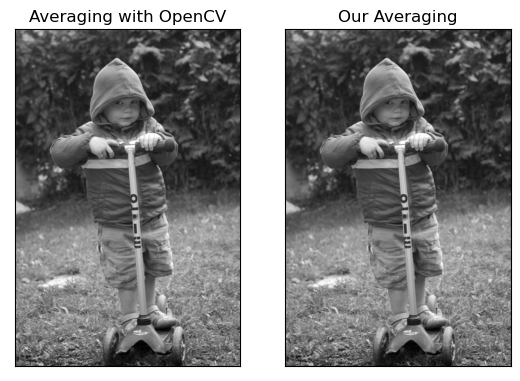

In [20]:
kernel = np.array(
[
    [1/9,1/9,1/9],
    [1/9,1/9,1/9],
    [1/9,1/9,1/9]
])

test_output = conv_nested(img_gray, kernel)
blurred_img = cv2.blur(img_gray,(3,3))


plt.subplot(121),plt.imshow(blurred_img , cmap = 'gray'),plt.title('Averaging with OpenCV')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(test_output, cmap = 'gray'),plt.title('Our Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

Ecrire la fonction **conv_fast**, une implémentation plus rapide de la convolution tirant partie des opérations sur les arrays définies dans numpy. En particulier la convolution peut être vue comme l'application d'une fenêtre glissante sur l'image qui calcule la somme des pixels contenue dans la fenêtre pondéré par les valeurs du noyau. Pour gérer les effets de bords, on appliquera le principe du zero pading.

In [21]:
def zero_pad(image, pad_height, pad_width):
    """ Zero-pad an image.
    Ex: a 1x1 image [[1]] with pad_height = 1, pad_width = 2 becomes:
        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]         of shape (3, 5)
    Args:
        image: numpy array of shape (H, W).
        pad_width: width of the zero padding (left and right padding).
        pad_height: height of the zero padding (bottom and top padding).
    Returns:
        out: numpy array of shape (H+2*pad_height, W+2*pad_width).
    """

    H, W = image.shape
    out = None

    out = np.zeros((H + 2 * pad_height, W + 2 * pad_width), dtype=image.dtype)
    out[pad_height:H + pad_height, pad_width: W + pad_width] = image
    return out


def conv_fast(image, kernel):
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    delta_y = Hk // 2
    delta_x = Wk // 2

    # flip kernel along both axes
    filter = np.copy(kernel)
    filter = np.flip(np.flip(filter, 0), 1)

    padded_img = zero_pad(image, delta_y, delta_x)

    for m in range(Hi):
        for n in range(Wi):
            out[m, n] = np.sum(padded_img[m : m + Hk, n : n + Wk] * filter)

    return out

Comparer vos différentes implémentations

conv_nested: took 79.167289 seconds.
conv_fast: took 20.708600 seconds.


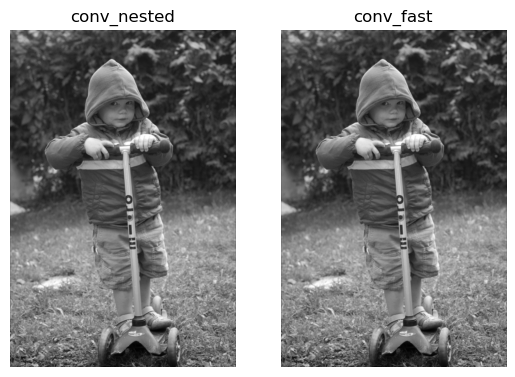

In [22]:
from time import *

kernel = np.array(
[
    [1,0,1],
    [0,0,0],
    [1,0,1]
])


t0 = time()
out_fast = conv_fast(img_gray, kernel)
t1 = time()
out_nested = conv_nested(img_gray, kernel)
t2 = time()

# Compare the running time of the two implementations
print("conv_nested: took %f seconds." % (t2 - t1))
print("conv_fast: took %f seconds." % (t1 - t0))

# Plot conv_nested output
plt.subplot(1,2,1)
plt.imshow(out_nested,cmap = 'gray')
plt.title('conv_nested')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(out_fast,cmap = 'gray')
plt.title('conv_fast')
plt.axis('off')

# Make sure that the two outputs are the same
if not (np.max(out_fast - out_nested) < 1e-10):
    print("Different outputs! Check your implementation.")

### Filtre de Nagao

Ce filtrage a été présenté dans l'article "Edge preserving smoothing" par M. Nagao et T. Matsuyama, dans le journal Computer Graphics and Image Processing de 1979, volume 9. Il permet un lissage de l'image conservant les contours, dans l'optique d'un prétraitement pour une segmentation par régions.

Le filtrage de Nagao qui consiste à prendre une fenêtre centrée sur chaque pixel et à considérer les 9 domaines $\mathcal{D}_i$ définis comme sur l'image ci-dessous.
![nagao](Images/nagao.png)


Ensuite, il s'agit de :
+  Calculer pour chaque domaine $\mathcal{D}_i$ la moyenne $\mu_i$ et la variance $\sigma_i^2$.
+  Remplacer chaque pixel par la moyenne du domaine de plus faible variance.

Ecrire une fonction mettant en oeuvre le principe du filtrage de Nagao

(-0.5, 1370.5, 2047.5, -0.5)

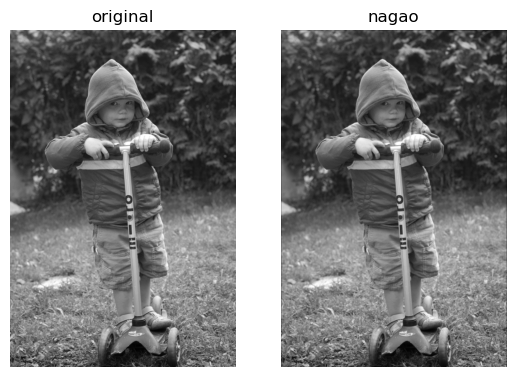

In [23]:
def nagao_filter(image):
    
    Hi, Wi = image.shape
    out = np.zeros((Hi, Wi))
    padded_img = zero_pad(image, 5//2, 5//2)
    
    for m in range(3,Hi+2):
        for n in range(3,Wi+2):
            M = np.zeros((9, 9))
            A=  padded_img[(m-2):(m+3),(n-2):(n+3)]
            M[:,0]=[A[1,3],A[1,4],A[2,2],A[2,3],A[2,4],A[3,3],A[3,4],0,0]
            M[:,1]=[A[0,1],A[0,2],A[0,3],A[1,1],A[1,2],A[1,3],A[2,2],0,0]
            M[:,2]=[A[2,2],A[3,1],A[3,2],A[3,3],A[4,1],A[4,2],A[4,3],0,0]
            M[:,3]=[A[0,1],A[1,1],A[0,2],A[1,2],A[2,2],A[0,3],A[1,3],0,0]
            M[:,4]=[A[1,1],A[1,2],A[1,3],A[2,1],A[2,2],A[2,3],A[1,3],A[2,3],A[3,3]]
            M[:,5]=[A[0,3],A[0,4],A[1,2],A[1,3],A[1,4],A[2,2],A[2,3],0,0] 
            M[:,6]=[A[2,2],A[2,3],A[3,2],A[3,3],A[3,4],A[4,3],A[4,4],0,0] 
            M[:,7]=[A[2,1],A[2,2],A[3,0],A[3,1],A[3,2],A[4,0],A[4,1],0,0]        
            M[:,8]=[A[0,0],A[0,1],A[1,0],A[1,1],A[1,2],A[2,1],A[2,2],0,0] 
            
            sigma = np.std(M)
            minindice= np.argmin(sigma)
            out[m-2,n-2] = np.mean(M[:,minindice])
    return out

            
            
filtered_nagao = nagao_filter(img_gray)  


plt.subplot(1,2,1)
plt.imshow(img_gray,cmap = 'gray')
plt.title('original')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(filtered_nagao,cmap = 'gray')
plt.title('nagao')
plt.axis('off')
     

### Filtres séparables  (adapté du cours CS 131 Stanford)

Nous allons comparer expérimentalement le temps d'exécution d'une convolution séparable 2D versus son équivalent en 1D. Nous utiliserons le noyau gaussien qui est un filtre séparable.


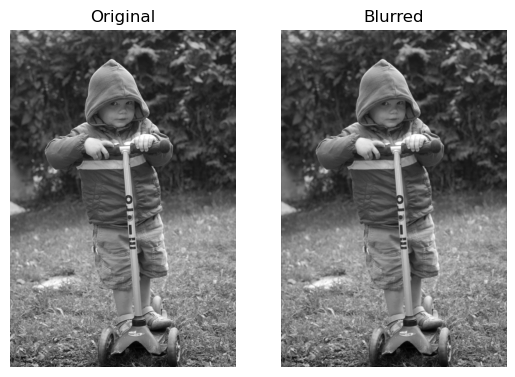

In [24]:
# Load image

img = cv2.imread('./Images/oscar.jpg',1)
img_gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 5x5 Gaussian blur
kernel = np.array(
[
    [1,4,6,4,1],
    [4,16,24,16,4],
    [6,24,36,24,6],
    [4,16,24,16,4],
    [1,4,6,4,1]
])

t0 = time()
out = conv_nested(img_gray, kernel)
t1 = time()
t_normal = t1 - t0

# Plot original image
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap = 'gray')
plt.title('Original')
plt.axis('off')

# Plot convolved image
plt.subplot(1,2,2)
plt.imshow(out,cmap = 'gray')
plt.title('Blurred')
plt.axis('off')

plt.show()

Ecrire l'équivalent avec des noyaux 1D (k1 and k2) dont le produit est égale au noyau gaussien.


In [25]:
# The kernel can be written as outer product of two 1D filters
k1 = np.array([[1],[4],[6],[4],[1],])
print (k1.shape)
k2 = np.array([[1,4,6,4,1],])
print (k2.shape)


# Check if kernel is product of k1 and k2
if not  np.all(k1 * k2 == kernel):
    print('k1 * k2 is not equal to kernel')
    
assert k1.shape == (5, 1), "k1 should have shape (5, 1)"
assert k2.shape == (1, 5), "k2 should have shape (1, 5)"

(5, 1)
(1, 5)


Comparer

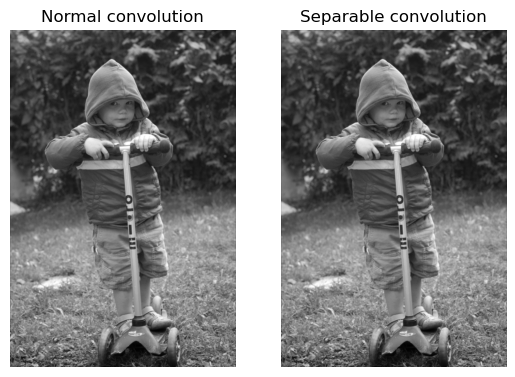

Normal convolution: took 216.970063 seconds.
Separable convolution: took 60.781743 seconds.


In [26]:
# Perform two convolutions using k1 and k2
t0 = time()
out_separable = conv_nested(img_gray, k1)
out_separable = conv_nested(out_separable, k2)
t1 = time()
t_separable = t1 - t0

# Plot normal convolution image
plt.subplot(1,2,1)
plt.imshow(out,cmap = 'gray')
plt.title('Normal convolution')
plt.axis('off')

# Plot separable convolution image
plt.subplot(1,2,2)
plt.imshow(out_separable,cmap = 'gray')
plt.title('Separable convolution')
plt.axis('off')

plt.show()

print("Normal convolution: took %f seconds." % (t_normal))
print("Separable convolution: took %f seconds." % (t_separable))


# Check if the two outputs are equal
assert np.max(out_separable - out) < 1e-10

